<a href="https://colab.research.google.com/github/surajkumar96/Machine-Learning/blob/master/Logistic_Reggression__part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Logistic Regression**

**LOGISTIC REGRESSION TO PREDICT HEART DISEASE.**

Introduction

World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression.

**Logistic Regression Assumptions**

1.Binary logistic regression requires the dependent variable to be binary.

2.For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.

3.Only meaningful variables should be included.

4.The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.

5.The independent variables are linearly related to the log odds.
Logistic regression requires quite large sample sizes.


In [0]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("font",size=16)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab

import seaborn as sns


In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
from google.colab import files
uploaded=files.upload()

Saving framingham.csv to framingham.csv


In [0]:
import io
data=pd.read_csv(io.BytesIO(uploaded['framingham.csv']))
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [0]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [0]:
data.isna().sum()/data.shape[0]


male               0.000000
age                0.000000
education          0.024776
currentSmoker      0.000000
cigsPerDay         0.006843
BPMeds             0.012506
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            0.011798
sysBP              0.000000
diaBP              0.000000
BMI                0.004483
heartRate          0.000236
glucose            0.091553
TenYearCHD         0.000000
dtype: float64

In [0]:
from sklearn import metrics
import warnings

import math

data['education'].fillna(data['education'].mean(),inplace=True)
data['cigsPerDay'].fillna(data['cigsPerDay'].mean(),inplace=True)
data['BPMeds'].fillna(data['BPMeds'].mean(),inplace=True)
data['totChol'].fillna(data['totChol'].mean(),inplace=True)
data['BMI'].fillna(data['BMI'].mean(),inplace=True)
data['heartRate'].fillna(data['heartRate'].mean(),inplace=True)
data['glucose'].fillna(data['glucose'].mean(),inplace=True)

In [0]:
data.isna().sum()/data.shape[0]

male               0.0
age                0.0
education          0.0
currentSmoker      0.0
cigsPerDay         0.0
BPMeds             0.0
prevalentStroke    0.0
prevalentHyp       0.0
diabetes           0.0
totChol            0.0
sysBP              0.0
diaBP              0.0
BMI                0.0
heartRate          0.0
glucose            0.0
TenYearCHD         0.0
dtype: float64

In [0]:
heart_df=data
heart_df.drop(['education'],axis=1,inplace=True)
heart_df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Data Preparation Source: The dataset is publically available on the Kaggle website, and it is from an ongoing ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes

In [0]:
heart_df.rename(columns={'male':'male_sex'},inplace=True)
heart_df.head()

,male_sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [0]:
# Checking the missing values 
heart_df.isnull().sum()

male_sex           0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

Exploratory Analysis

In [0]:
#Counting the missing values and dropping them
count=0
for i in heart_df.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)
print('since it is only',round((count/len(heart_df.index))*100), 'percent of the entire dataset the rows with missing values are excluded.')

heart_df.dropna(axis=0,inplace=True)

heart_df.describe()

Total number of rows with missing values is  0
since it is only 0 percent of the entire dataset the rows with missing values are excluded.


,male_sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.00000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,0.429212,49.584946,0.494101,9.003089,0.02963,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,0.500024,11.879230,0.16852,0.076587,0.462763,0.158316,44.326453,22.038097,11.910850,4.070953,12.025177,22.836603,0.359023
min,0.000000,32.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.00000,0.000000,1.000000,0.000000,262.000000,144.000000,89.875000,28.037500,83.000000,85.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.00000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [0]:
#adding a constant
from statsmodels.tools import add_constant as add_constant

heart_df_constant=add_constant(heart_df)
heart_df_constant

,const,male_sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,1,39,0,0.0,0.00000,0,0,0,195.0,106.0,70.0,26.97,80.0,77.000000,0
1,1.0,0,46,0,0.0,0.00000,0,0,0,250.0,121.0,81.0,28.73,95.0,76.000000,0
2,1.0,1,48,1,20.0,0.00000,0,0,0,245.0,127.5,80.0,25.34,75.0,70.000000,0
3,1.0,0,61,1,30.0,0.00000,0,1,0,225.0,150.0,95.0,28.58,65.0,103.000000,1
4,1.0,0,46,1,23.0,0.00000,0,0,0,285.0,130.0,84.0,23.10,85.0,85.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1.0,1,50,1,1.0,0.00000,0,1,0,313.0,179.0,92.0,25.97,66.0,86.000000,1
4234,1.0,1,51,1,43.0,0.00000,0,0,0,207.0,126.5,80.0,19.71,65.0,68.000000,0
4235,1.0,0,48,1,20.0,0.02963,0,0,0,248.0,131.0,72.0,22.00,84.0,86.000000,0
4236,1.0,0,44,1,15.0,0.00000,0,0,0,210.0,126.5,87.0,19.16,86.0,81.966753,0


**Logistic Regression**

Logistic regression is a type of regression analysis in statistics used for prediction of outcome of a categorical dependent variable from a set of predictor or independent variables. In logistic regression the dependent variable is always binary. Logistic regression is mainly used to for prediction and also calculating the probability of success.

**Chi-square Test**

● A Chi-square Test (also written 𝜒2) is used to determine the probability of an observed frequency of events given an expected frequency

Chi-square Test

● The chi-square formula considers the sum of square distances between observed values O and expected values E, divided by each expected value: 𝜒2 = ((𝑂 − 𝐸)e2)/E

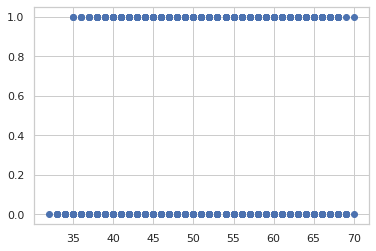

In [0]:
from matplotlib import pyplot
x=heart_df_constant['age']
y=heart_df_constant['TenYearCHD']
pyplot.scatter(x, y)
pyplot.show()

Logistic regression is a predictive analysis, like linear regression, but logistic regression involves prediction of a dichotomous dependent variable. The predictors can be continuous or dichotomous, just as in regression analysis, but ordinary least squares regression (OLS) is not appropriate if the outcome is dichotomous. Whereas the OLS regression uses normal probability theory, logistic regression uses binomial probability theory. This makes things a bit more complicated mathematically, so we will only cover this topic fairly superficially (believe me, I'm mixing it with sugar!).

**Chi-square and Logistic Regression**

Because the binomial distribution is used, we might expect that there will be a relationship between logistic regression and chi-square analysis. It turns out that the 2 X 2 contingency analysis with chi-square is really just a special case of logistic regression, and this is analogous to the relationship between ANOVA and regression. With chi-square contingency analysis, the independent variable is dichotomous and the dependent variable is dichotomous. We can also conduct an equivalent logistic regression analysis with a dichotomous independent variable predicting a dichotomous dependent variable. Logistic regression is a more general analysis, however, because the independent variable (i.e., the predictor) is not restricted to a dichotomous variable. Nor is logistic regression limited to a single predictor.

Let's take an example. Coronary heart disease (CHD) is an increasing risk as one's age increases. We can think of CHD as a dichotomous variable (although one can also imagine some continuous measures of this). For this example, either a patient has CHD or not. If we were to plot the relationship between age and CHD in a scatterplot, we would get something that looks like this:

![correlation between y(CHD) and x(age)](http://web.pdx.edu/~newsomj/pa551/Image313.gif)

We can see from the graph that there is somewhat of a greater likelihood that CHD will occur at older ages. But this figure is not very suitable for examining that. If we tried to draw a straight (best fitting) line through the points, it would not do a very good job of explaining the data. One solution would be to convert or transform these numbers into probabilities. We might compute the average of the y values at each point on the x axis. The y values can only be 0 or 1, so an average of them will be between 0 and 1 (.2, .9, .6 etc.). This average is the same as the probability of having a value of 1 on the y variable, given a certain value of x (notated as P(y|xi). So, we could then plot the probabilities of y at each value of x and it would look something like this:

![correlation between y(CHD) and x(age)](http://web.pdx.edu/~newsomj/pa551/Image314.gif)

This is a smoother curve, and it is easy to see that the probability of having CHD increases as values of x increase. What we have just done is transform the scores so that the curve now fits a cumulative probability curve for the logistic distribution. As you can see this curve is not a straight line; it is more of an s-shaped curve. This s-shape, however, resembles some statistical distributions that can be used to generate a type of regression equation and its statistical tests.

In [0]:
st.chisqprob=lambda chisq,df:st.chi2.sf(chisq,df)
cols=heart_df_constant.columns[:-1]
model=sm.Logit(heart_df.TenYearCHD,heart_df_constant[cols])
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.378665
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4238
Model:                          Logit   Df Residuals:                     4223
Method:                           MLE   Df Model:                           14
Date:                Tue, 26 May 2020   Pseudo R-squ.:                  0.1113
Time:                        19:00:07   Log-Likelihood:                -1604.8
converged:                       True   LL-Null:                       -1805.8
Covariance Type:            nonrobust   LLR p-value:                 4.833e-77
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.1649      0.644    -12.677      0.000      -9.427      -6.903
male_sex            0.5063      0.100      5.044      0.000       0.310       0.703
age                 0.0623      0.006     10.094      0.000       0.050       0.074
currentSmoker       0.0152      0.144      0.105      0.916      -0.267       0.298
cigsPerDay          0.0212      0.006      3.709      0.000       0.010       0.032
BPMeds              0.2453      0.220      1.114      0.265      -0.186       0.677
prevalentStroke     0.9665      0.441      2.190      0.029       0.102       1.831
prevalentHyp        0.2308      0.128      1.796      0.072      -0.021       0.483
diabetes            0.1934      0.294      0.658      0.511      -0.383       0.769
totChol             0.0018      0.001      1.775      0.076      -0.000       0.004
sysBP               0.0142      0.004      4.024      0.000       0.007       0.021
diaBP              -0.0030      0.006     -0.509      0.611      -0.015       0.009
BMI                 0.0038      0.012      0.323      0.747      -0.019       0.027
heartRate          -0.0015      0.004     -0.375      0.707      -0.009       0.006
glucose             0.0067      0.002      3.114      0.002       0.002       0.011
===================================================================================
"""

p-value helps you to decide whether there is a relationship between two variables or not.

The smaller the p-value this mean the more confident you are about the existence of relationship between the two variables. The origins of p-values comes form hypothesis testing in statistics. In hypothesis testing, you have two hypothesis:

H0 (called the null hypothesis ) : There is no relationship between the two variables.

H1 (called the alternative hypothesis): There exist a relationship between the two variables.

If the p-value is less than small threshold (often 0.05 is used), then you can reject the null hypothesis H0, which means that you decide that there is a relationship between the two variables.

One intuitive interpretation of p-value: it is the likelihood of observing the data points when the null hypothesis is true (there is no relationship between the two variables). Therefore, if the p-value is too small this means that it is very unlikely that the dataset was generated by chance and we decide that null hypothesis is false.

**Takes in the dataframe, the dependent variable and a list of column names,
runs the regression repeatedly eleminating feature with the highest
P-value above alpha one at a time and returns the regression summary
with all p-values below alpha.**

In [0]:
def back_feature_elem (data_frame,dep_var,col_list):
    while len(col_list)>0 :
        model=sm.Logit(dep_var,data_frame[col_list])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            col_list=col_list.drop(largest_pvalue.index)

result=back_feature_elem(heart_df_constant,heart_df.TenYearCHD,cols)

Use the confidence interval to assess the estimate of the odds ratio. For example, with a 95% confidence level, you can be 95% confident that the confidence interval contains the value of the odds ratio for the population.

**Odds Ratio (Confidence Interval Term)**


ORyx (Y, X Odds Ratio)


Specify one or more values of the odds ratio of Y and X, a measure of the effect size (event rate) that is to be
detected by the study. This is the ratio of the odds of the outcome Y given that the exposure X = 1 to the odds of
Y = 1 given X = 0. That is, odds(Y=1|X=1) / odds(Y=1|X=0). Note that odds(A) = Pr(A)/Pr(Not A)
You can enter a single value such as 1.5 or a series of values such as 1.5 2 2.5 or 0.5 to 0.9 by 0.1.
The range of this parameter is 0 < ORyx < ∞ (typically, 0.1 < ORyx < 10). 

In [0]:
#Interpreting the results: Odds Ratio, Confidence Intervals and Pvalues

params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue=round(result.pvalues,3)
conf['pvalue']=pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print ((conf))

                 CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
const                0.000098       0.000453    0.000211   0.000
male_sex             1.344023       1.967372    1.626098   0.000
age                  1.054519       1.079303    1.066839   0.000
cigsPerDay           1.013970       1.029407    1.021659   0.000
prevalentStroke      1.211841       6.697239    2.848858   0.016
sysBP                1.013235       1.021214    1.017217   0.000
glucose              1.004386       1.010830    1.007603   0.000


**splitting data to train and test split**

In [0]:
import sklearn
new_features=heart_df[['age','male_sex','cigsPerDay','totChol','sysBP','glucose','TenYearCHD']]
x=new_features.iloc[:,:-1]
y=new_features.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=5)

from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

**Confusion Matrix**


A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known.Let us look at some of the important terms of confusion matrix.

![Example of confusion matrix](https://miro.medium.com/max/772/1*GMlSubndVt3g7FmeQjpeMA.png)


In [0]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[702   0]
 [137   9]]


In [0]:
sklearn.metrics.accuracy_score(y_test,y_pred)

0.8384433962264151